# Load libraries

In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
import train_test_loader
import show_images
from new_model import Net
import albumentations as A
from albumentations.pytorch import ToTensorV2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Without Augmentation

In [ ]:
means = [0.4914, 0.4822, 0.4465]
stds = [0.2470, 0.2435, 0.2616]

train_transforms = A.Compose(
    [


        A.Normalize(mean=means, std=stds, always_apply=True),
        ToTensorV2(),
    ]
)

test_transforms = A.Compose(
    [
        A.Normalize(mean=means, std=stds, always_apply=True),
        ToTensorV2(),
    ]
)

/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/dropout/cutout.py:50: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


# Load train test data

In [ ]:
classes, trainloader, testloader = train_test_loader.load(train_transforms,test_transforms,batch_size=512)

# Model Summary

In [ ]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1,

## Find Max Learning Rate using LRFinder

  0%|          | 0/200 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 6.97E-02


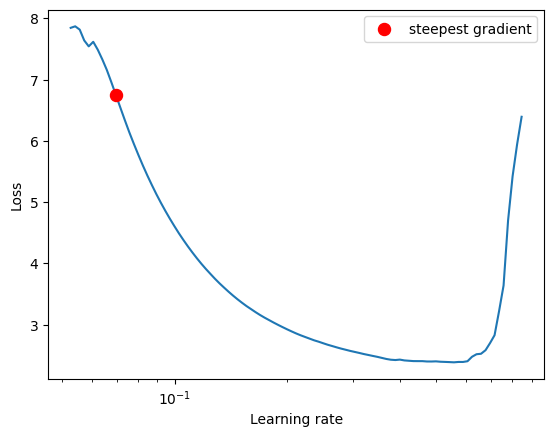

In [ ]:
from torch_lr_finder import LRFinder

model = Net().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.04, weight_decay=1e-4)
criterion = nn.CrossEntropyLoss()
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, end_lr=10, num_iter=200, step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

# Model Training

In [ ]:
EPOCHS = 24
scheduler = OneCycleLR(
        optimizer,
        max_lr=4.51E-02,
        steps_per_epoch=len(trainloader),
        epochs=EPOCHS,
        pct_start=5/EPOCHS,
        div_factor=100,
        three_phase=False,
        final_div_factor=100,
        anneal_strategy='linear'
    )
train_test.train_model(model,device,trainloader,testloader,optimizer,criterion,24,scheduler,batch_scheduler=True,best_acc = 0,path = "/content/drive/MyDrive/EVA/bestmodel.pt")

EPOCH: 0


Loss=2.1308016777038574 Batch_id=97 Accuracy=11.67: 100%|██████████| 98/98 [00:20<00:00,  4.86it/s]



Test set: Average loss: 2.1574, Accuracy: 1982/10000 (19.82%)

EPOCH: 1


Loss=1.6963697671890259 Batch_id=97 Accuracy=30.30: 100%|██████████| 98/98 [00:20<00:00,  4.82it/s]



Test set: Average loss: 1.9302, Accuracy: 2943/10000 (29.43%)

EPOCH: 2


Loss=1.4889802932739258 Batch_id=97 Accuracy=40.27: 100%|██████████| 98/98 [00:20<00:00,  4.90it/s]



Test set: Average loss: 1.8637, Accuracy: 3452/10000 (34.52%)

EPOCH: 3


Loss=1.3532848358154297 Batch_id=97 Accuracy=47.35: 100%|██████████| 98/98 [00:20<00:00,  4.85it/s]



Test set: Average loss: 1.5914, Accuracy: 4374/10000 (43.74%)

EPOCH: 4


Loss=1.1630909442901611 Batch_id=97 Accuracy=54.45: 100%|██████████| 98/98 [00:21<00:00,  4.61it/s]



Test set: Average loss: 1.1855, Accuracy: 5611/10000 (56.11%)

EPOCH: 5


Loss=0.9795249700546265 Batch_id=97 Accuracy=60.48: 100%|██████████| 98/98 [00:20<00:00,  4.84it/s]



Test set: Average loss: 1.1069, Accuracy: 6056/10000 (60.56%)

EPOCH: 6


Loss=0.97742760181427 Batch_id=97 Accuracy=63.97: 100%|██████████| 98/98 [00:20<00:00,  4.88it/s]



Test set: Average loss: 0.9266, Accuracy: 6714/10000 (67.14%)

EPOCH: 7


Loss=0.9740455150604248 Batch_id=97 Accuracy=65.86: 100%|██████████| 98/98 [00:20<00:00,  4.75it/s]



Test set: Average loss: 1.2421, Accuracy: 5944/10000 (59.44%)

EPOCH: 8


Loss=1.032889723777771 Batch_id=97 Accuracy=66.82: 100%|██████████| 98/98 [00:20<00:00,  4.79it/s]



Test set: Average loss: 0.9772, Accuracy: 6561/10000 (65.61%)

EPOCH: 9


Loss=0.8518408536911011 Batch_id=97 Accuracy=67.81: 100%|██████████| 98/98 [00:19<00:00,  4.91it/s]



Test set: Average loss: 1.1408, Accuracy: 6113/10000 (61.13%)

EPOCH: 10


Loss=0.9587759375572205 Batch_id=97 Accuracy=68.05: 100%|██████████| 98/98 [00:20<00:00,  4.75it/s]



Test set: Average loss: 0.8616, Accuracy: 6987/10000 (69.87%)

EPOCH: 11


Loss=0.9394095540046692 Batch_id=97 Accuracy=68.96: 100%|██████████| 98/98 [00:20<00:00,  4.83it/s]



Test set: Average loss: 1.1331, Accuracy: 6206/10000 (62.06%)

EPOCH: 12


Loss=0.8674384355545044 Batch_id=97 Accuracy=68.95: 100%|██████████| 98/98 [00:19<00:00,  4.92it/s]



Test set: Average loss: 0.9085, Accuracy: 6834/10000 (68.34%)

EPOCH: 13


Loss=0.9693922400474548 Batch_id=97 Accuracy=69.56: 100%|██████████| 98/98 [00:20<00:00,  4.81it/s]



Test set: Average loss: 0.8413, Accuracy: 7147/10000 (71.47%)

EPOCH: 14


Loss=0.8740192651748657 Batch_id=97 Accuracy=70.11: 100%|██████████| 98/98 [00:19<00:00,  4.90it/s]



Test set: Average loss: 0.9624, Accuracy: 6734/10000 (67.34%)

EPOCH: 15


Loss=0.8919835090637207 Batch_id=97 Accuracy=69.89: 100%|██████████| 98/98 [00:19<00:00,  4.92it/s]



Test set: Average loss: 0.8140, Accuracy: 7229/10000 (72.29%)

EPOCH: 16


Loss=0.9619011878967285 Batch_id=97 Accuracy=70.43: 100%|██████████| 98/98 [00:20<00:00,  4.83it/s]



Test set: Average loss: 0.8833, Accuracy: 7012/10000 (70.12%)

EPOCH: 17


Loss=0.7340977191925049 Batch_id=97 Accuracy=70.50: 100%|██████████| 98/98 [00:19<00:00,  4.90it/s]



Test set: Average loss: 1.2180, Accuracy: 6010/10000 (60.10%)

EPOCH: 18


Loss=0.8984478712081909 Batch_id=97 Accuracy=70.70: 100%|██████████| 98/98 [00:19<00:00,  4.96it/s]



Test set: Average loss: 1.0272, Accuracy: 6559/10000 (65.59%)

EPOCH: 19


Loss=0.880237877368927 Batch_id=97 Accuracy=70.52: 100%|██████████| 98/98 [00:20<00:00,  4.89it/s]



Test set: Average loss: 0.7947, Accuracy: 7228/10000 (72.28%)

EPOCH: 20


Loss=0.8916774988174438 Batch_id=97 Accuracy=70.05: 100%|██████████| 98/98 [00:20<00:00,  4.79it/s]



Test set: Average loss: 0.9506, Accuracy: 6666/10000 (66.66%)

EPOCH: 21


Loss=0.988480269908905 Batch_id=97 Accuracy=70.97: 100%|██████████| 98/98 [00:19<00:00,  4.98it/s]



Test set: Average loss: 0.9297, Accuracy: 6836/10000 (68.36%)

EPOCH: 22


Loss=0.7889997363090515 Batch_id=97 Accuracy=71.22: 100%|██████████| 98/98 [00:19<00:00,  4.99it/s]



Test set: Average loss: 0.9725, Accuracy: 6755/10000 (67.55%)

EPOCH: 23


Loss=0.8229787945747375 Batch_id=97 Accuracy=71.10: 100%|██████████| 98/98 [00:19<00:00,  4.91it/s]



Test set: Average loss: 1.0504, Accuracy: 6326/10000 (63.26%)

